# Downloading text from a web-page.

In [7]:
# Method 1
import bs4 as beutifulsoup
import urllib

# Method 2 -- for pyhton 2 only
# import mechanize

# Method 3
from selenium import webdriver

import re as re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### I chose a random paper from pubmed central to scrape. 

In [8]:
# URL = 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5364643/'
URL = 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5124365/'

### Method 1
The standard way to download we webpage usinng python.

The following should work for many web-pages

In [12]:
# Python 2
# r = urllib.urlopen(URL).read()

# Python 3
r = urllib.request.urlopen(URL).read()

HTTPError: HTTP Error 403: Forbidden

In [11]:
soup = beutifulsoup.BeautifulSoup(r)
page_html = soup.prettify()

print( page_html )

NameError: name 'r' is not defined

### BUT!
 it doesn't work with PubmedCentral because they don't want us to crash their servers by scraping their website. 

See the "Your client does not have permission to get this resource from this server." above. 


**IF your html looks good, you can skip the second method.**

### Method 2 -- for python 2
Use mechanize, which is essentially a python-acessable web-browser. 

In [5]:
chrome = mechanize.Browser()
chrome.set_handle_robots(False)
chrome.addheaders = [('User-agent', 
'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36')]
htmltext = chrome.open(URL).read()


To avoid problems like the one we ran into with urllib, it's probably important to pring the html so we can see what we're looking for.

In [7]:
soup = beutifulsoup.BeautifulSoup(htmltext)
page_html = soup.prettify()

print page_html

<!--?xml version="1.0" encoding="utf-8"?-->
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <!-- AppResources meta begin -->
  <script type="text/javascript">
   var ncbi_startTime = new Date();
  </script>
  <!-- AppResources meta end -->
  <!-- TemplateResources meta begin -->
  <meta content="" name="paf_template"/>
  <!-- TemplateResources meta end -->
  <!-- Logger begin -->
  <meta content="pmc" name="ncbi_db"/>
  <meta content="article" name="ncbi_pdid"/>
  <meta content="" name="ncbi_acc"/>
  <meta content="eneuro" name="ncbi_domain"/>
  <meta content="record" name="ncbi_report"/>
  <meta content="fulltext" name="ncbi_type"/>
  <meta content="" name="ncbi_objectid"/>
  <meta content="/articles/PMC5364643/" name="ncbi_pcid"/>
  <meta content="pmc" name="ncbi_a

Unfortunately, mechanize doesn't work for python3 users. To get this to work in Python 3, we need method 3.

### Method 3 -- for python 3
RoboBrowser
You will have to install it by going to your command prompt and typing: 

<code>    pip install robobrowser</code>

In [14]:
# ! pip install robobrowser

In [15]:
from robobrowser import RoboBrowser

browser = RoboBrowser(history = True)

browser.open(URL)

# unfortunately, robobrowser doesn't want to just return the web-page text. 
# To get the web-source as a string, you will need to use the following code. 
htmltext = browser.select('body')
paragraphs = []
for x in htmltext:
    paragraphs.append(str(x))
htmltext=''.join(paragraphs)



/Users/WBR/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/WBR/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


# Doing something with regular expressions

#### Central _what_?
Grab anytime this paper uses the word "central" and return the next word.

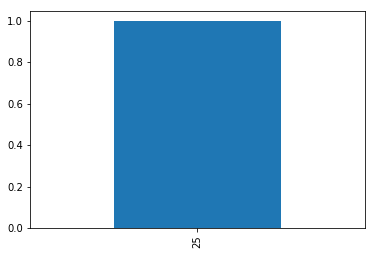

In [16]:
pattern = re.compile(r'central (?P<central_what>\w*)', re.IGNORECASE)
match_iterator = pattern.finditer(htmltext)
matches = [ str(match.groupdict()['central_what']).lower() for match in match_iterator ]

pd.Series( matches ).value_counts().plot(kind='bar')

### The Extent and Consequences of P-Hacking in Science

http://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002106

#### N = 
Get anytime the paper says N = ?? and get the N.

Realized that "n" is often surrounded by ```<em> \</em>``` so I got rid of 'em... 

In [38]:
no_em_html = re.sub(r'\<\/*em\>', '', htmltext )

In [45]:
pattern = re.compile(r'n\W*=\W*(?P<n>\d*\.*\d*)\W*(?P<unit>\w*\W*)', re.IGNORECASE)
match_iterator = pattern.finditer(no_em_html)
for match in match_iterator:
    print( match.groupdict() )

{'n': '', 'unit': 'pmc/" '}
{'n': '7', 'unit': 'naïve '}
{'n': '6', 'unit': 'shock '}
{'n': '7', 'unit': 'naïve '}
{'n': '6', 'unit': 'shock '}
{'n': '7', 'unit': 'naïve '}
{'n': '6', 'unit': 'shock '}
{'n': '3', 'unit': 'slices '}
{'n': '10', 'unit': 'control, '}
{'n': '9', 'unit': 'ChR2) '}
{'n': '10', 'unit': 'control, '}
{'n': '9', 'unit': 'ChR2). ('}
{'n': '8', 'unit': 'control, '}
{'n': '9', 'unit': 'ChR2) '}
{'n': '9', 'unit': 'control, '}
{'n': '10', 'unit': 'ChR2). ('}
{'n': '9', 'unit': 'cells '}
{'n': '5', 'unit': 'cells '}
{'n': '6', 'unit': 'cells '}
{'n': '7', 'unit': 'cells '}
{'n': '5', 'unit': 'cells '}
{'n': '8', 'unit': 'cells '}
{'n': '4', 'unit': 'cells '}
{'n': '5', 'unit': 'cells '}
{'n': '6', 'unit': 'cells '}
{'n': '7', 'unit': 'cells '}
{'n': '21', 'unit': 'cells '}
{'n': '7', 'unit': 'cells '}
{'n': '5', 'unit': 'cells '}
{'n': '7', 'unit': 'cells '}
{'n': '5', 'unit': 'cells '}
{'n': '7', 'unit': 'cells '}
{'n': '6', 'unit': 'cells '}
{'n': '10', 'unit': 'fl

#### P = 

Try the same thing for p. 

In [49]:
pattern = re.compile(r'\Wp\W*=\W*(?P<p>\d*\.*\d*)\W*(?P<unit>\w*\W*\w*\W*\w*\W*)', re.DOTALL)
match_iterator = pattern.finditer(no_em_html)
for match in match_iterator:
    print( match.groupdict() )

{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '0.001', 'unit': 'Student’s unpaired '}
{'p': '', 'unit': 'lt;0.001, '}
{'p': '001', 'unit': 'Student’s unpaired '}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}
{'p': '', 'unit': 'PMC3&amp;id='}


In [78]:
print(htmltext)

<body class="article">
<div class="grid">
<div class="col twelve_col nomargin shadow">
<!-- System messages like service outage or JS required; this is handled by the TemplateResources portlet -->
<div class="sysmessages">
<noscript>
<p class="nojs">
<strong>Warning:</strong>
	The NCBI web site requires JavaScript to function. 
	<a href="/guide/browsers/#enablejs" target="_blank" title="Learn how to enable JavaScript">more...</a>
</p>
</noscript>
</div>
<!--/.sysmessage-->
<div class="wrap">
<div class="page">
<div class="top">
<div class="universal_header" id="universal_header"><ul class="inline_list jig-ncbimenu ui-ncbimenu resources_list" id="navcontent"><li class="ui-ncbimenu-item-leaf ui-ncbimenu-item-first ui-helper-reset ui-ncbimenu-item-no-hlt"><a accesskey="1" class="ui-ncbimenu-link-first" href="/" id="ncbihome" role="banner" title="NCBI Home"><span class="offscreen_noflow">NCBI</span><img alt="NCBI Logo" class="ncbi_logo" src="//static.pubmed.gov/portal/portal3rc.fcgi/416004

In [85]:
pattern = re.compile(r'p\W*(?P<eq>[=><])(?P<p>\d*\.*\d+)\W*(?P<context>(\w+\W){7})', re.DOTALL)

match_list = []
match_iterator = pattern.finditer(htmltext)
for match in match_iterator:
    match_list.append( match.groupdict() )

df = pd.DataFrame(match_list)
print(df)

                                         context eq      p
0  sup>Rowett Institute of Nutrition and Health,  >      3
1   sup>National Institute on Alcohol Abuse and   >      4
2  sup>Rowett Institute of Nutrition and Health,  >      3
3   sup>National Institute on Alcohol Abuse and   >      4
4  sup>Rowett Institute of Nutrition and Health,  >      3
5  sup>Rowett Institute of Nutrition and Health,  >      3
6   sup>National Institute on Alcohol Abuse and   >      4
7          Student’s unpaired two-tailed t-test)  =  0.001
8          Student’s unpaired two-tailed t-test)  =   .001


It seems this paper doesn't report a lot of p-values. 

All signs point to small numbers of neurons and low p-values. I rate it a 2/5 skull-and-crossbones (the universal metric of failure). 

## BUT! We made a mistake!

When we downloaded the page, they replaced "<" with & lt;.

In [117]:
replace_dict = {'&lt;': '<', '&gt;': '>'}
for key in replace_dict:
    htmltext = htmltext.replace(key, replace_dict[key])

In [118]:
pattern = re.compile(r'\Wp\W*(?P<eq>[><=])(?P<p>\d*\.*\d+)\W*(?P<context>(\w+\W){7})', re.DOTALL)

match_list = []
match_iterator = pattern.finditer(filtered_text)
for match in match_iterator:
    match_list.append( match.groupdict() )

df = pd.DataFrame(match_list)
print(df)



                                      context eq      p
0       Student’s unpaired two-tailed t-test,  <   0.05
1       Student’s unpaired two-tailed t-test,  <   0.05
2       Student’s unpaired two-tailed t-test,  <   0.05
3         Student’s paired two-tailed t-test,  <   0.05
4       Student’s unpaired two-tailed t-test,  <   0.05
5       Student’s unpaired two-tailed t-test,  <   0.05
6       Student’s unpaired two-tailed t-test,  <   0.05
7       Student’s unpaired two-tailed t-test,  <   0.05
8       Student’s unpaired two-tailed t-test,  <   0.05
9       Student’s unpaired two-tailed t-test,  <   0.05
10      Student’s unpaired two-tailed t-test,  >   0.05
11      Student’s unpaired two-tailed t-test)  <   0.01
12      Student’s unpaired two-tailed t-test)  <   0.01
13      Student’s unpaired two-tailed t-test)  <  0.001
14      Student’s unpaired two-tailed t-test)  =  0.001
15      Student’s unpaired two-tailed t-test)  <  0.001
16      Student’s unpaired two-tailed t-test)  <

In [119]:
df.groupby(['eq','p']).count()

context
eq p             
<  0.001        6
   0.01         5
   0.05        14
=  .001         1
   0.001        1
>  0.05         2

In [11]:
# import dryscrape
# >>> from bs4 import BeautifulSoup
# >>> session = dryscrape.Session()
# >>> session.visit(my_url)
# >>> response = session.body()
# >>> soup = BeautifulSoup(response)
# >>> soup.find(id="intro-text")
# <p id="intro-text">Yay! Supports javascript</p>


ImportError: No module named dryscrape